<a href="https://colab.research.google.com/github/erskinekof/erskinekof.github.io/blob/master/Dr_Erskine_VANET_Malicious_node_XGBOOS%2C_LIGM_Classifier_Untitled62.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)


y_pred = clf.predict(X_test.to_numpy())

NameError: name 'X_test' is not defined

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [3]:
import pandas as pd

# Assuming 'clf' and 'feature_names' are already defined
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

NameError: name 'feature_names' is not defined

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (700, 4)
Shape of X_test: (300, 4)
Shape of y_train: (700,)
Shape of y_test: (300,)


In [5]:
import pandas as pd

try:
    df_vanet = pd.read_csv('vanet_malicious_nodes.csv')
    print("File loaded successfully. Here are the first 5 rows:")
    display(df_vanet.head())
except FileNotFoundError:
    print("Error: 'vanet_malicious_nodes.csv' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

Error: 'vanet_malicious_nodes.csv' not found. Please ensure the file is in the correct directory.



🚀 Training XGBoost Classifier...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:21:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       748
           1       1.00      1.00      1.00       252

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



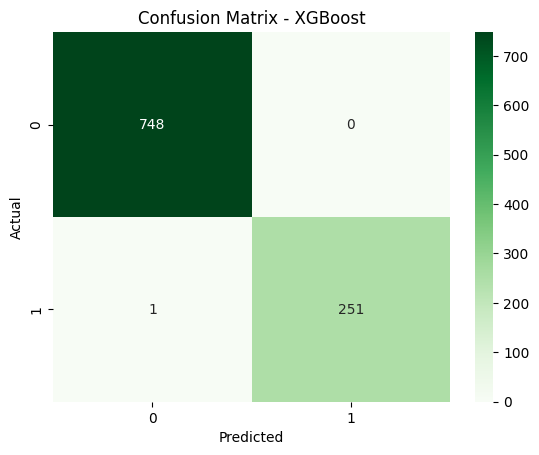

✅ XGBoost Accuracy: 99.90%

🚀 Training LightGBM Classifier...
[LightGBM] [Info] Number of positive: 1010, number of negative: 2990
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.252500 -> initscore=-1.085323
[LightGBM] [Info] Start training from score -1.085323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



📊 LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       748
           1       0.98      0.99      0.99       252

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



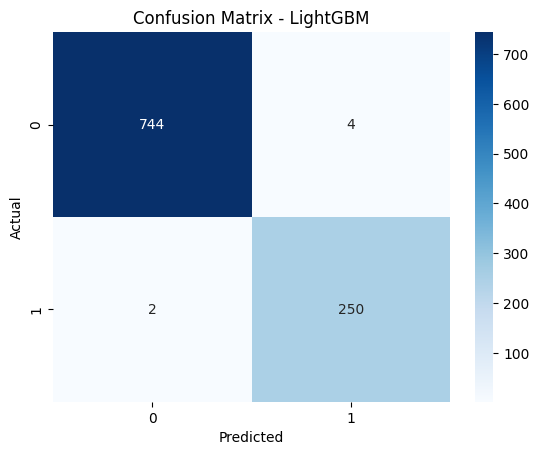

In [9]:
# 📌 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ML Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 📁 Load dataset
df = pd.read_csv("/content/sample_data/vanet_malicious_nodes.csv")

# 🧹 Preprocessing
df.drop(columns=['node_id'], inplace=True, errors='ignore')

X = df.drop('is_malicious', axis=1)
y = df['is_malicious']

# 🔄 Scale features (optional but good for some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📤 Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# =============== ⚙️ Model 1: XGBoost ===============
print("\n🚀 Training XGBoost Classifier...")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("\n📊 XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"✅ XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%")

# =============== ⚙️ Model 2: LightGBM ===============
print("\n🚀 Training LightGBM Classifier...")
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluation
print("\n📊 LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()